Train Shape: (891, 12)
Test Shape: (418, 11)
Age Mean: 29.36158249158249
Age Std Dev: 13.012388272793666
Survival Ratio: 0.3838383838383838


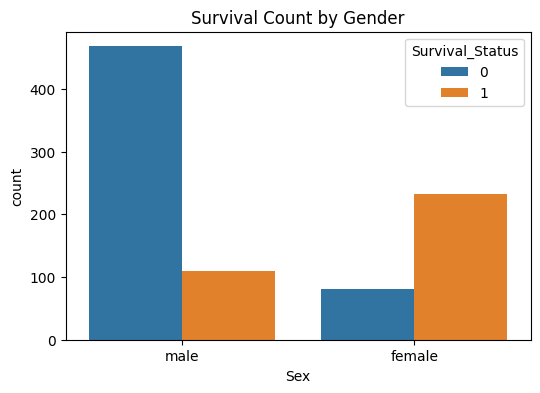

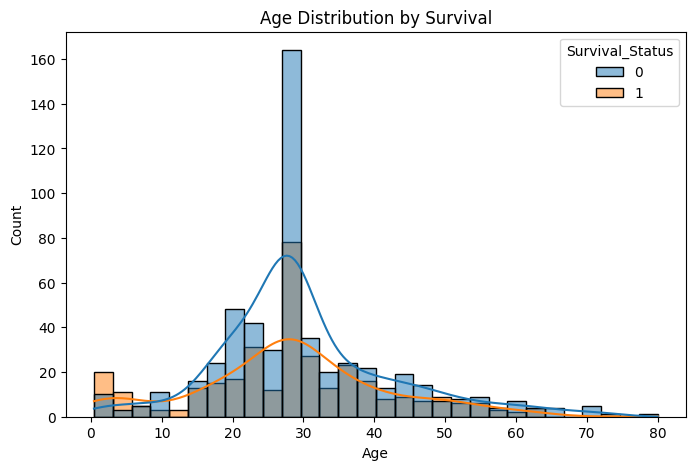

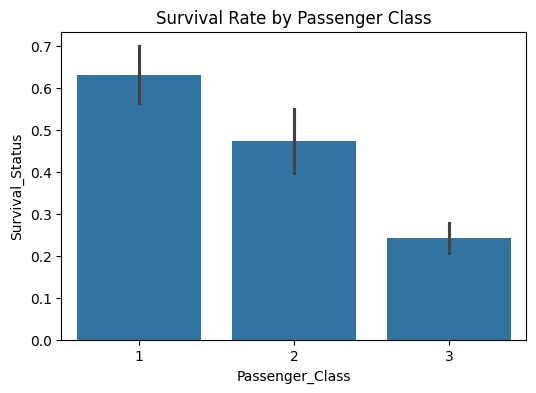

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print("Train Shape:", train_df.shape)
print("Test Shape:", test_df.shape)

for df in [train_df, test_df]:
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df.drop(columns=['Cabin'], inplace=True, errors='ignore')

train_df.rename(columns={
    'Survived': 'Survival_Status',
    'Pclass': 'Passenger_Class',
    'SibSp': 'Siblings_Spouses_Aboard',
    'Parch': 'Parents_Children_Aboard'
}, inplace=True)

df = train_df.copy()

females_survived = df[(df['Sex'] == 'female') & (df['Survival_Status'] == 1)]
gender_survival = df.groupby('Sex')['Survival_Status'].apply(lambda x: x.astype(int).mean())
top_fare = df.sort_values('Fare', ascending=False).head()
class_gender_group = df.groupby(['Passenger_Class', 'Sex'])['Survival_Status'].agg(lambda x: x.astype(int).mean())


survived_np = df['Survival_Status'].astype(int).values
total_np = np.ones_like(survived_np)
survival_ratio = np.sum(survived_np) / np.sum(total_np)

age_array = df['Age'].values
print("Age Mean:", np.mean(age_array))
print("Age Std Dev:", np.std(age_array))
print("Survival Ratio:", survival_ratio)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', hue='Survival_Status')
plt.title('Survival Count by Gender')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Survival_Status', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Passenger_Class', y=df['Survival_Status'].astype(int))
plt.title('Survival Rate by Passenger Class')
plt.show()

train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

test_df = test_df.reindex(columns=train_df.drop(columns=['Survival_Status', 'Name', 'Ticket']).columns, fill_value=0)

X_train = train_df.drop(columns=['Survival_Status', 'Name', 'Ticket', 'PassengerId'])
y_train = train_df['Survival_Status'].astype(int)
X_test = test_df.drop(columns=['Name', 'Ticket', 'PassengerId'], errors='ignore')

X_test = X_test.fillna(X_train.median())

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

